### NeuroDOT_py Preprocessing Script
 This script includes details on the Preprocessing pipeline. <br>
 A file of sample data is already designated below, but you can use the "loadmat_py function to load your own optical data in 'mat' file format. <br>
 In order to load the sample file, change the path below in the "sys.path.insert" lines to the folder under which you have NeuroDOT_py installed.

In [5]:
# General imports
import sys
import math

import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.colors as colors
import scipy.interpolate
import numpy.matlib as mlb
import numpy.matlib as nm
import functools as ft

from math import trunc
from pickle import NONE
from numpy import float64, matrix
from numpy.lib.shape_base import expand_dims
from matplotlib.pyplot import colorbar, colormaps
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.mplot3d import Axes3D

#importing neurodot fuctions from library 
from Visualizations import viz
from Spatial_Transforms import sx4m
from Temporal_Transforms import tx4m
from Light_Modeling import lmdl
from File_IO import io
from Analysis import anlys
from dynamicFilterMode_py import dynamicFilterMode_py

# from neuro_dot.Reconstruction as recon
from Matlab_Equivalent_Functions import matlab
# from GUIs as gui
# from Stim as stim
# from Support as spt


ModuleNotFoundError: No module named 'Visualizations'

In [2]:
patient_data = "/Users/yashthacker/Documents/Google Drive/OHBM 2022/PreProcessingPipeline_NeuroDOT - Container/workspace/neuro_dot/NeuroDOT_Data_Sample_CCW1_py.mat"
saveImagePath = "/Users/yashthacker/Documents/Google Drive/OHBM 2022/PreProcessingPipeline_NeuroDOT - Container/workspace/savedFigures/"

In [3]:
## S-D Measurements
data = io.loadmat(patient_data)['data'] # data, info, flags
__info = io.loadmat(patient_data)['info'] # adding __info makes info private, so any changes will be function-specific
flags = io.loadmat(patient_data)['flags']

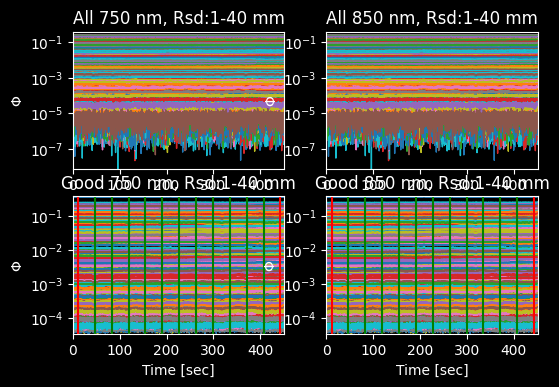

<Figure size 432x288 with 0 Axes>

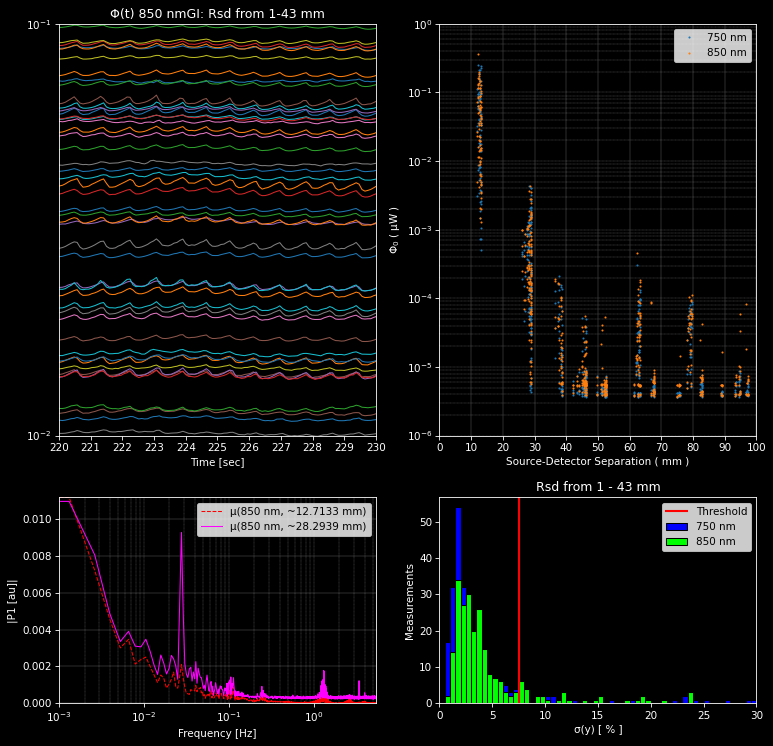

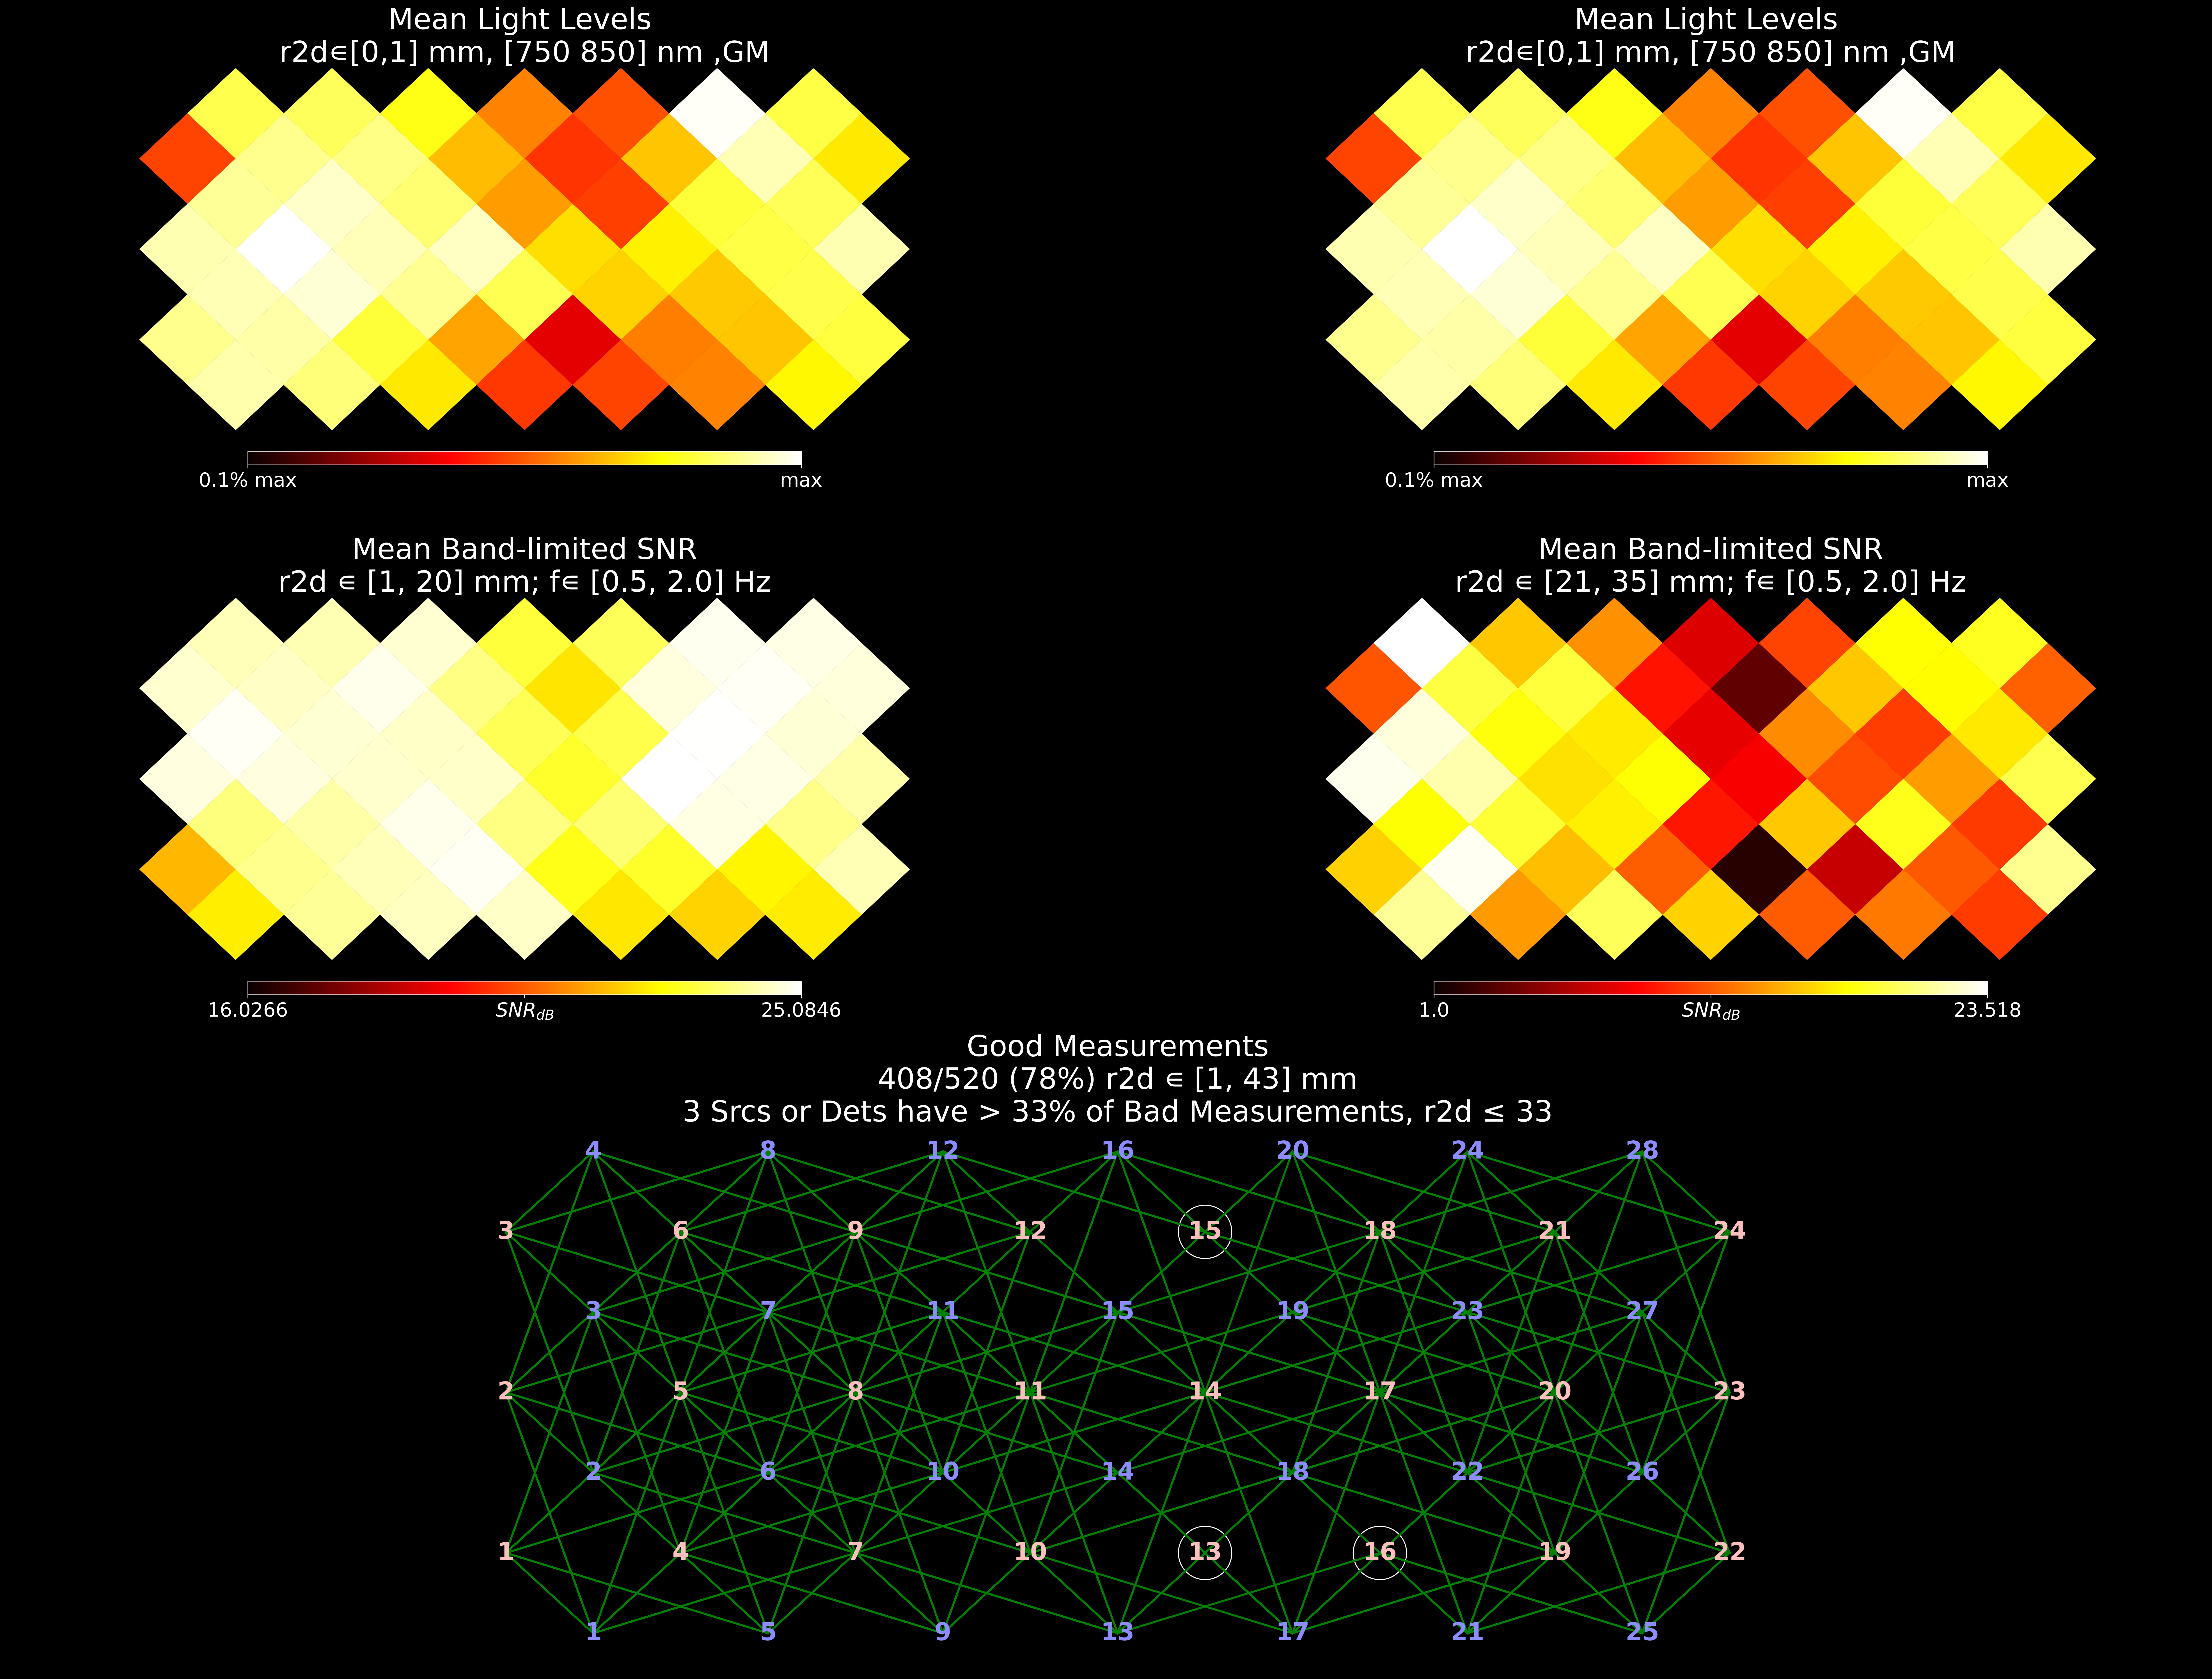

In [4]:
viz.Plot_RawData_Time_Traces_Overview(data,__info)   # Time traces
filename = saveImagePath +'Time_Traces_Overview.png'
plt.savefig(filename,format = 'png')
viz.Plot_RawData_Metrics_II_DQC(data,__info)         # Spectrum, falloff, and good signal metric
filename = saveImagePath +'RawData_Metrics_II.png'
plt.savefig(filename,format = 'png')
__info_out = viz.Plot_RawData_Cap_DQC(data,__info)   # Cap-relevant views
filename = saveImagePath +'RawData_Cap_DQC.png'
plt.savefig(filename,format = 'png')

In [5]:
## Logmean Light Levels
lmdata = tx4m.logmean(data)[0]

/Users/yashthacker/Documents/Google Drive/OHBM 2022/PreProcessingPipeline_NeuroDOT - Container/workspace/savedFigures/fft_lml.png


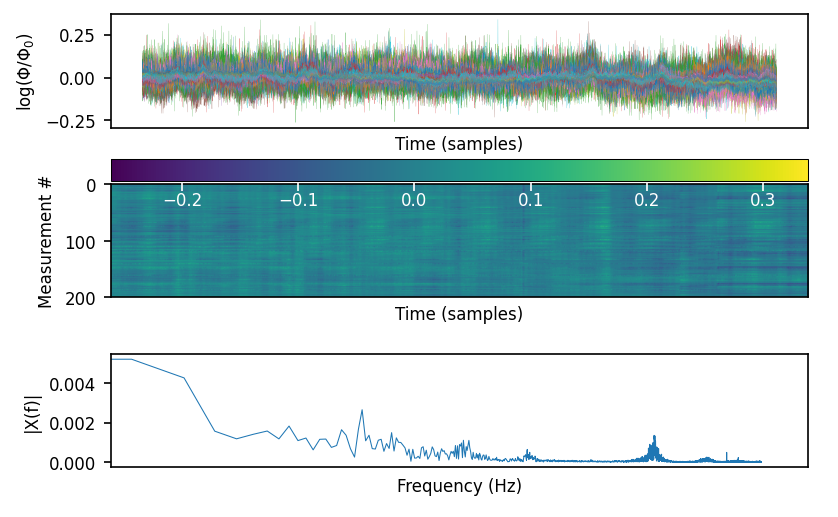

In [6]:
## Detect Noisy Channels
info = anlys.FindGoodMeas(lmdata, __info, 0.075)

# Example visualization
keep = np.logical_and(np.logical_and(np.where(info['pairs']['WL'] == 2,1,0), np.where(info['pairs']['r2d'] < 40,1,0)), info['MEAS']['GI']) # measurements to include

dynamicFilterMode_py(data,info, 'fft_lml','yes',saveImagePath)

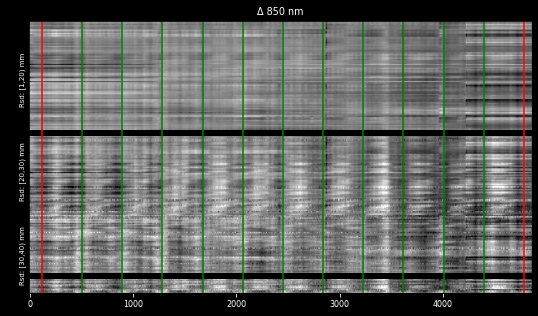

In [7]:
## Show nn1, nn2, nn3 (plots)
viz.nlrGrayPlots_220324(lmdata,info)
filename = saveImagePath +'nlrGrayPlots.png'
plt.savefig(filename,format = 'png')

/Users/yashthacker/Documents/Google Drive/OHBM 2022/PreProcessingPipeline_NeuroDOT - Container/workspace/savedFigures/lml.png


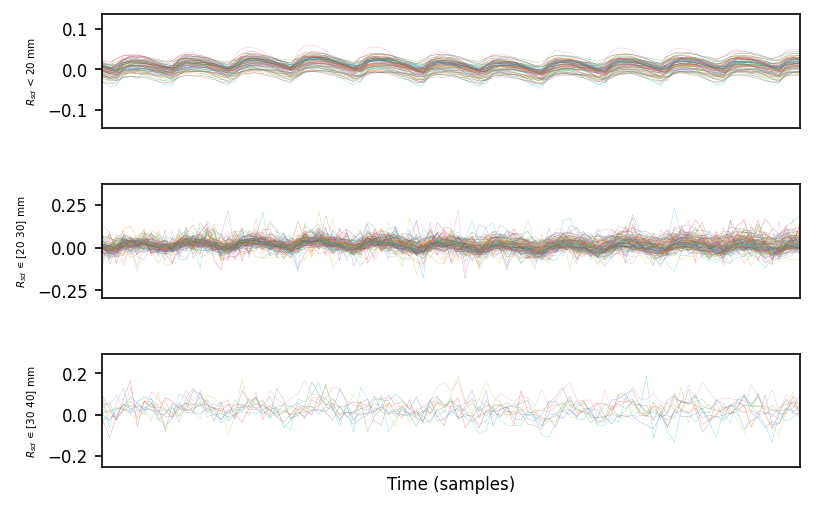

In [8]:
dynamicFilterMode_py(data,info, 'lml','yes',saveImagePath)

/Users/yashthacker/Documents/Google Drive/OHBM 2022/PreProcessingPipeline_NeuroDOT - Container/workspace/savedFigures/fft_dt_hp.png


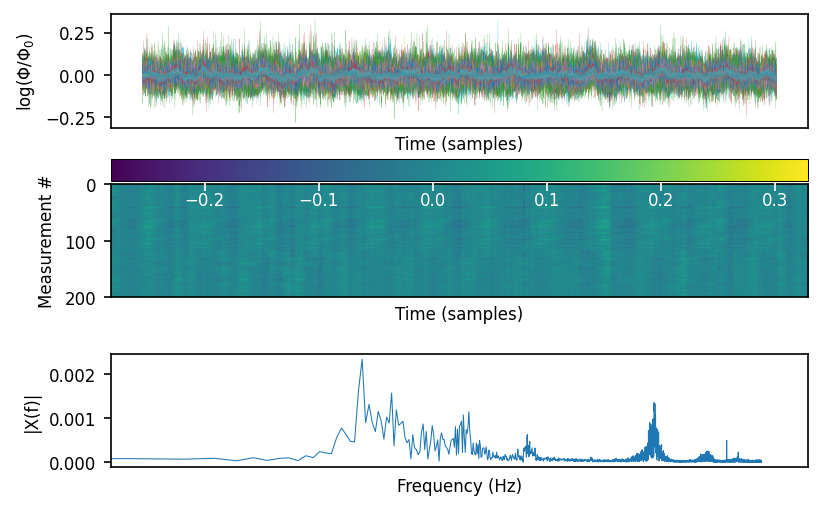

In [9]:
## Detrend and High-pass Filter the Data
dynamicFilterMode_py(data,info, 'fft_dt_hp','yes',saveImagePath)

/Users/yashthacker/Documents/Google Drive/OHBM 2022/PreProcessingPipeline_NeuroDOT - Container/workspace/savedFigures/high_pass.png


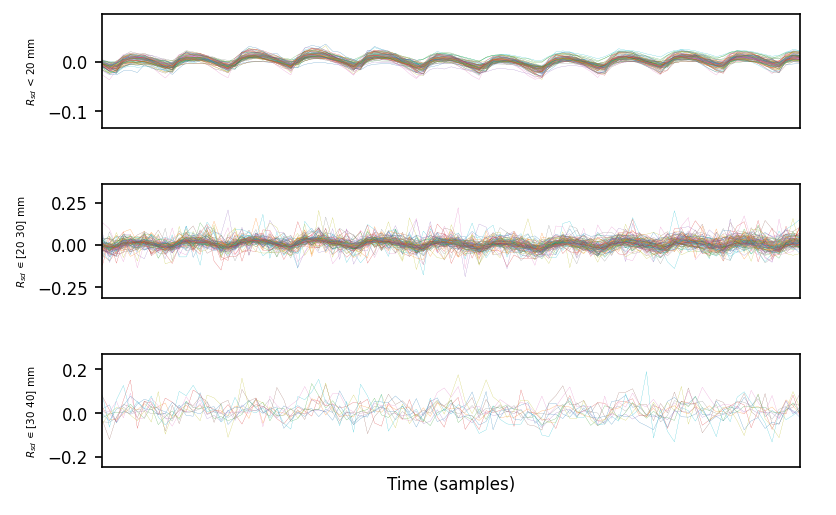

In [10]:
dynamicFilterMode_py(data,info, 'high_pass','yes',saveImagePath)

/Users/yashthacker/Documents/Google Drive/OHBM 2022/PreProcessingPipeline_NeuroDOT - Container/workspace/savedFigures/low_pass_fft.png


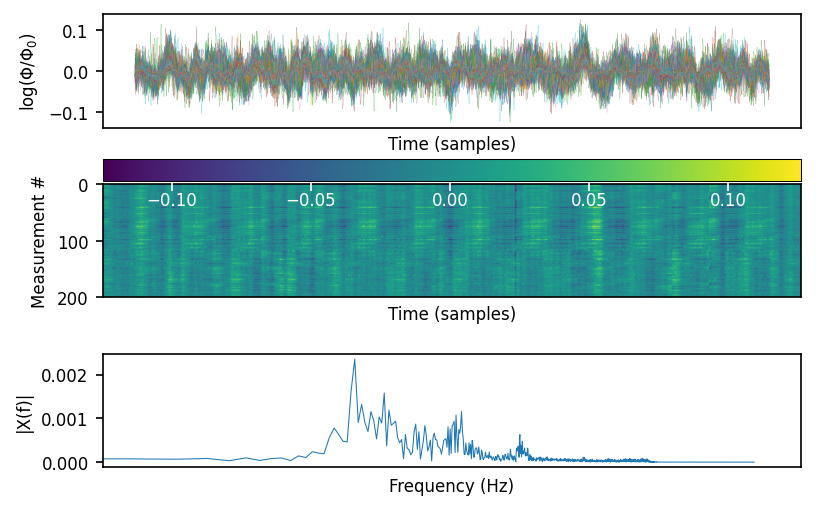

In [11]:
## Low Pass Filter 1
dynamicFilterMode_py(data,info, 'low_pass_fft','yes',saveImagePath)

/Users/yashthacker/Documents/Google Drive/OHBM 2022/PreProcessingPipeline_NeuroDOT - Container/workspace/savedFigures/low_pass.png


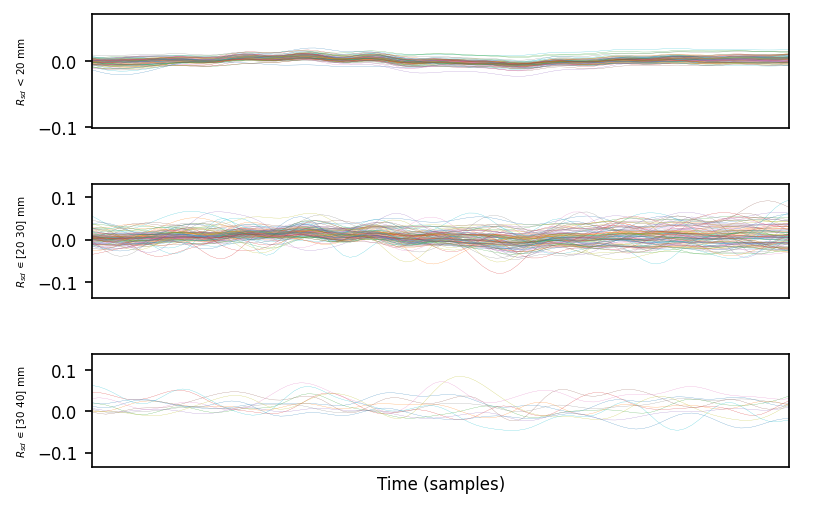

In [12]:
dynamicFilterMode_py(data,info, 'low_pass','yes',saveImagePath)


/Users/yashthacker/Documents/Google Drive/OHBM 2022/PreProcessingPipeline_NeuroDOT - Container/workspace/savedFigures/fft_superficial_signal.png


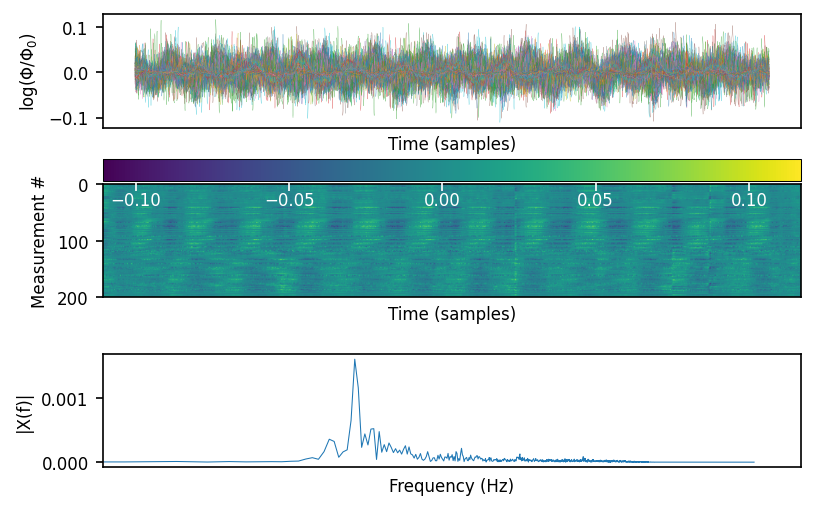

In [13]:
## Superficial Signal Regression
dynamicFilterMode_py(data,info, 'fft_superficial_signal','yes',saveImagePath)

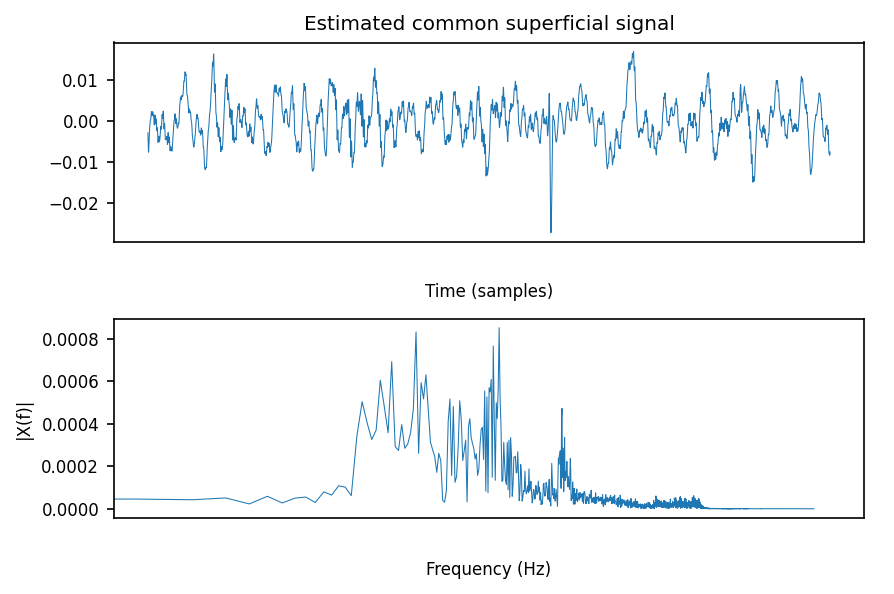

In [14]:
# Generate 2 subplots
fig = plt.figure(dpi = 150, tight_layout = True)
ddata = tx4m.detrend_tts(lmdata)
hpdata = tx4m.highpass(ddata, 0.02, info['system']['framerate'])
lp1data = tx4m.lowpass(hpdata, 1, info['system']['framerate']) 
hem = tx4m.gethem(lp1data, info)
gs = gridspec.GridSpec(2,1)
ax1 =  plt.subplot(gs[0,0])
ax2 =  plt.subplot(gs[1,0])

ax1.plot(hem[1,:], linewidth = 0.5)
ax1.set_title('Estimated common superficial signal')
ax1.set_xlabel('Time (samples)')
arr1 = hem[1,:]
arr = np.reshape(arr1, (1,np.size(arr1)))
ftdomain,ftmag,_,_ = tx4m.fft_tts(arr,info['system']['framerate']) 
ftmag = np.reshape(ftmag, (len(ftdomain)))
ax2.semilogx(ftdomain,ftmag, linewidth = 0.5)
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('|X(f)|') # plot vs. log frequency
ax2.set_xlim([1e-3, 10])

filename = saveImagePath +'fft_SSR.png'
plt.savefig(filename,format = 'png')

/Users/yashthacker/Documents/Google Drive/OHBM 2022/PreProcessingPipeline_NeuroDOT - Container/workspace/savedFigures/superficial_signal.png


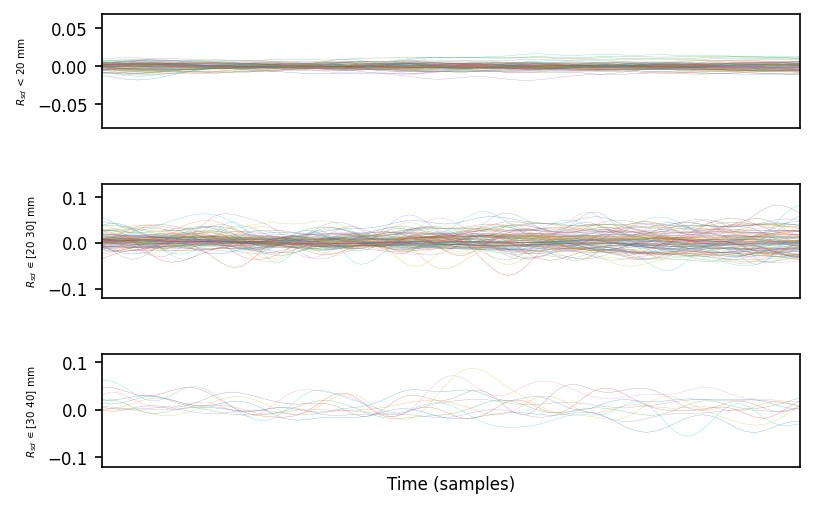

In [15]:
dynamicFilterMode_py(data,info, 'superficial_signal','yes',saveImagePath)

/Users/yashthacker/Documents/Google Drive/OHBM 2022/PreProcessingPipeline_NeuroDOT - Container/workspace/savedFigures/fft_low_pass2.png


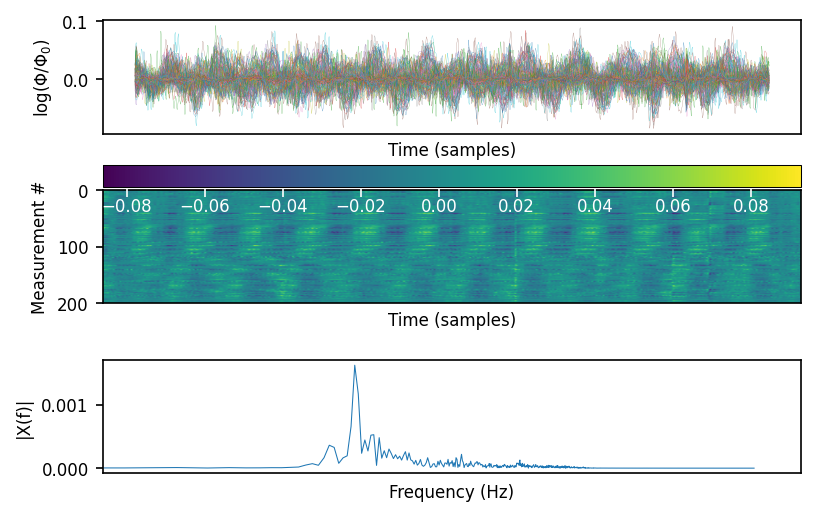

In [16]:
## Low Pass Filter 2
dynamicFilterMode_py(data,info,'fft_low_pass2','yes',saveImagePath)

/Users/yashthacker/Documents/Google Drive/OHBM 2022/PreProcessingPipeline_NeuroDOT - Container/workspace/savedFigures/fft_resample.png


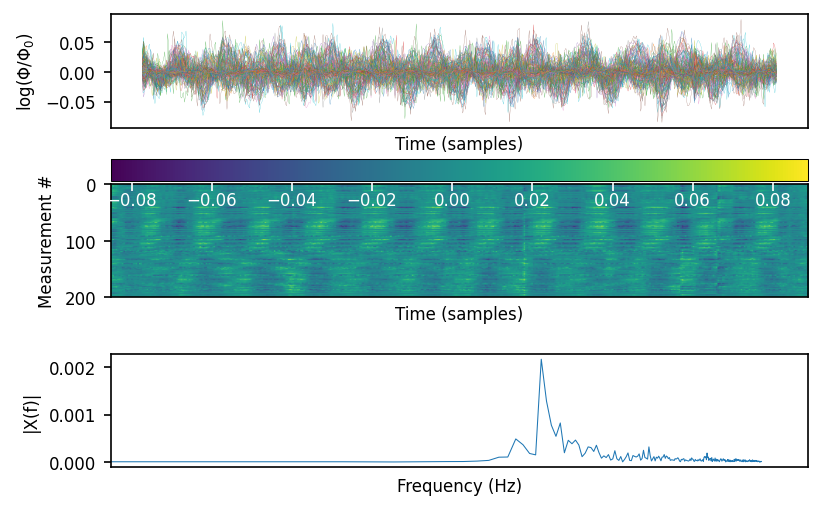

In [17]:
info_new = dynamicFilterMode_py(data,info, 'fft_resample','yes',saveImagePath)

/Users/yashthacker/Documents/Google Drive/OHBM 2022/PreProcessingPipeline_NeuroDOT - Container/workspace/savedFigures/resample.png


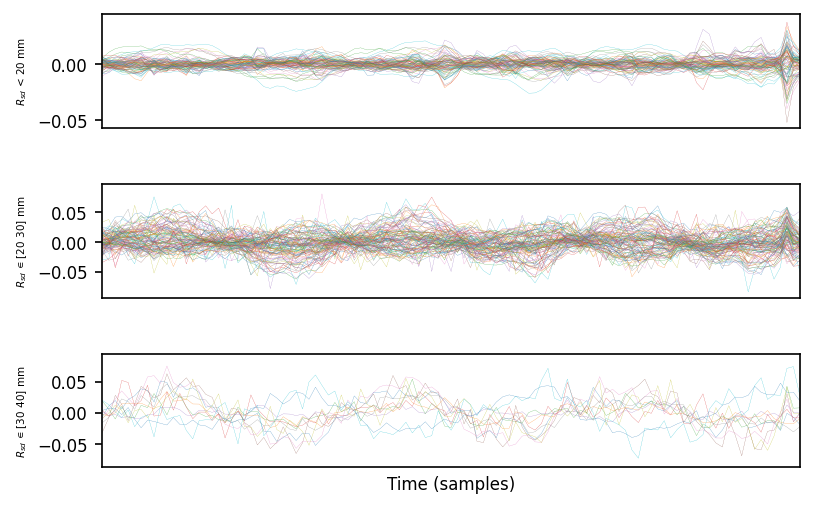

In [18]:
info_new = dynamicFilterMode_py(data,info, 'resample','yes',saveImagePath)

/Users/yashthacker/Documents/Google Drive/OHBM 2022/PreProcessingPipeline_NeuroDOT - Container/workspace/savedFigures/fft_ba.png


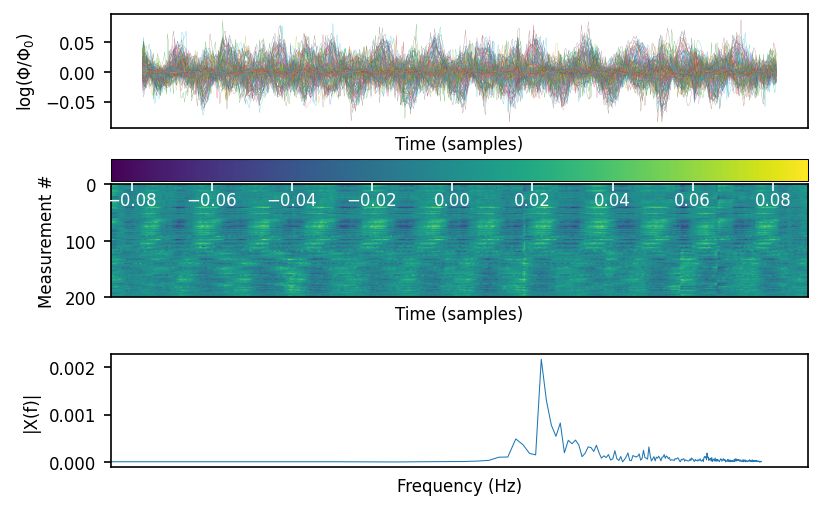

In [19]:
info_new = dynamicFilterMode_py(data,info, 'fft_ba','yes',saveImagePath)

/Users/yashthacker/Documents/Google Drive/OHBM 2022/PreProcessingPipeline_NeuroDOT - Container/workspace/savedFigures/ba.png


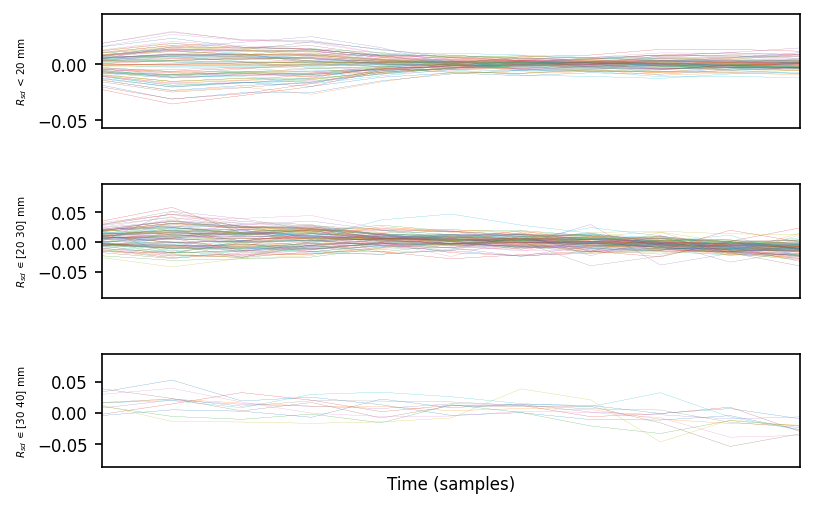

In [20]:
info_new = dynamicFilterMode_py(data,info, 'ba','yes',saveImagePath)